In [ ]:
# Ste1:  Loading data
import pandas as pd
import numpy as np
collision_data = pd.read_csv('E:\\data_warehouse_group_a2\\traffic_collision\\Traffic Collisions Open Data\\Traffic_Collisions_Open_Data.csv')
collision_data
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704704 entries, 0 to 704703
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           704704 non-null  int64  
 1   EVENT_UNIQUE_ID    704704 non-null  object 
 2   OCC_DATE           704704 non-null  object 
 3   OCC_MONTH          704704 non-null  object 
 4   OCC_DOW            704704 non-null  object 
 5   OCC_YEAR           704704 non-null  int64  
 6   OCC_HOUR           704704 non-null  int64  
 7   DIVISION           704704 non-null  object 
 8   FATALITIES         704704 non-null  int64  
 9   INJURY_COLLISIONS  704700 non-null  object 
 10  FTR_COLLISIONS     704700 non-null  object 
 11  PD_COLLISIONS      704700 non-null  object 
 12  HOOD_158           704704 non-null  object 
 13  NEIGHBOURHOOD_158  704704 non-null  object 
 14  LONG_WGS84         704704 non-null  float64
 15  LAT_WGS84          704704 non-null  float64
 16  AU

In [38]:
### Step 2:  Data Cleaning
# Get the total number of missing values for each column in the dataset.
null_counts = collision_data.isnull().sum()

# FILTERING OUT COLUMNS WITH NULL VALUES
columns_with_nulls = null_counts[null_counts > 0]
print("Columns with null values and their counts:")
print(columns_with_nulls)


Columns with null values and their counts:
INJURY_COLLISIONS    4
FTR_COLLISIONS       4
PD_COLLISIONS        4
AUTOMOBILE           4
MOTORCYCLE           4
PASSENGER            4
BICYCLE              4
PEDESTRIAN           4
dtype: int64


In [39]:
# Step 1: Delete missing values - since there are only 8 columns having null values
# And there are only 4 missing values for each column, so we can consider deleting these rows
collision_data.dropna(axis=0,how="any",inplace=True)
collision_data
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           704700 non-null  int64  
 1   EVENT_UNIQUE_ID    704700 non-null  object 
 2   OCC_DATE           704700 non-null  object 
 3   OCC_MONTH          704700 non-null  object 
 4   OCC_DOW            704700 non-null  object 
 5   OCC_YEAR           704700 non-null  int64  
 6   OCC_HOUR           704700 non-null  int64  
 7   DIVISION           704700 non-null  object 
 8   FATALITIES         704700 non-null  int64  
 9   INJURY_COLLISIONS  704700 non-null  object 
 10  FTR_COLLISIONS     704700 non-null  object 
 11  PD_COLLISIONS      704700 non-null  object 
 12  HOOD_158           704700 non-null  object 
 13  NEIGHBOURHOOD_158  704700 non-null  object 
 14  LONG_WGS84         704700 non-null  float64
 15  LAT_WGS84          704700 non-null  float64
 16  AUTOMOB

In [40]:
# Step 3: Delete unnecessary columns
collision_data = collision_data.drop(columns=['HOOD_158', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'])
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   OBJECTID           704700 non-null  int64 
 1   EVENT_UNIQUE_ID    704700 non-null  object
 2   OCC_DATE           704700 non-null  object
 3   OCC_MONTH          704700 non-null  object
 4   OCC_DOW            704700 non-null  object
 5   OCC_YEAR           704700 non-null  int64 
 6   OCC_HOUR           704700 non-null  int64 
 7   DIVISION           704700 non-null  object
 8   FATALITIES         704700 non-null  int64 
 9   INJURY_COLLISIONS  704700 non-null  object
 10  FTR_COLLISIONS     704700 non-null  object
 11  PD_COLLISIONS      704700 non-null  object
 12  NEIGHBOURHOOD_158  704700 non-null  object
 13  AUTOMOBILE         704700 non-null  object
 14  MOTORCYCLE         704700 non-null  object
 15  PASSENGER          704700 non-null  object
 16  BICYCLE            704700

In [41]:
# Extract OCC_DATE 
collision_data['OCC_DATE'] = pd.to_datetime(collision_data['OCC_DATE'], errors='coerce')

# Extract Year, Month, Day from OCC_DATE
collision_data['acc_year'] = collision_data['OCC_DATE'].dt.year
collision_data['acc_month'] = collision_data['OCC_DATE'].dt.month
collision_data['acc_day'] = collision_data['OCC_DATE'].dt.day

collision_data
collision_data.info()

print("Accident Year: ", collision_data['acc_year'])
print("Accident Month: ", collision_data['acc_month'])
print("Accident Date: ", collision_data['acc_day'])

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OBJECTID           704700 non-null  int64         
 1   EVENT_UNIQUE_ID    704700 non-null  object        
 2   OCC_DATE           704700 non-null  datetime64[ns]
 3   OCC_MONTH          704700 non-null  object        
 4   OCC_DOW            704700 non-null  object        
 5   OCC_YEAR           704700 non-null  int64         
 6   OCC_HOUR           704700 non-null  int64         
 7   DIVISION           704700 non-null  object        
 8   FATALITIES         704700 non-null  int64         
 9   INJURY_COLLISIONS  704700 non-null  object        
 10  FTR_COLLISIONS     704700 non-null  object        
 11  PD_COLLISIONS      704700 non-null  object        
 12  NEIGHBOURHOOD_158  704700 non-null  object        
 13  AUTOMOBILE         704700 non-null  object       

In [42]:
# Step 4: For columns 'BICYCLE', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'PEDESTRIAN'
# we need to change their original datatype (Object)
# to Binary (0, 1), so that we can use them for further analysis
# Firstly, check all the columns have unique values
print(collision_data['AUTOMOBILE'].unique())
print(collision_data['MOTORCYCLE'].unique())
print(collision_data['PASSENGER'].unique())
print(collision_data['BICYCLE'].unique())
print(collision_data['PEDESTRIAN'].unique())

['YES' 'N/R' 'NO']
['NO' 'N/R' 'YES']
['NO' 'YES' 'N/R']
['NO' 'N/R' 'YES']
['NO' 'YES' 'N/R']


In [43]:
# Continues.......
def map_values(value):
    if value == 'YES':
        return 1
    elif value == 'NO':
        return 0
    else:
        return np.nan

collision_data['AUTOMOBILE'] = collision_data['AUTOMOBILE'].apply(map_values)
collision_data['MOTORCYCLE'] = collision_data['MOTORCYCLE'].apply(map_values)
collision_data['PASSENGER'] = collision_data['PASSENGER'].apply(map_values)
collision_data['BICYCLE'] = collision_data['BICYCLE'].apply(map_values)
collision_data['PEDESTRIAN'] = collision_data['PEDESTRIAN'].apply(map_values)

In [25]:
collision_data

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,FTR_COLLISIONS,PD_COLLISIONS,NEIGHBOURHOOD_158,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN
0,1,GO-20148000005,1/1/2014 5:00:00 AM,January,Wednesday,2014,13,D23,0,NO,NO,YES,Kingsview Village-The Westway (6),1.0,0.0,0.0,0.0,0.0
1,2,GO-20148000085,1/1/2014 5:00:00 AM,January,Wednesday,2014,19,D42,0,NO,YES,NO,Agincourt South-Malvern West (128),1.0,0.0,0.0,0.0,0.0
2,3,GO-20141260499,1/1/2014 5:00:00 AM,January,Wednesday,2014,2,NSA,0,YES,NO,NO,NSA,1.0,0.0,0.0,0.0,0.0
3,4,GO-20141260663,1/1/2014 5:00:00 AM,January,Wednesday,2014,3,NSA,0,NO,NO,YES,NSA,1.0,0.0,0.0,0.0,0.0
4,5,GO-20141261162,1/1/2014 5:00:00 AM,January,Wednesday,2014,5,NSA,0,YES,NO,NO,NSA,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704699,704700,GO-20248155589,9/30/2024 5:00:00 AM,September,Monday,2024,7,D32,0,NO,NO,YES,Newtonbrook East (50),1.0,0.0,0.0,0.0,0.0
704700,704701,GO-20248155725,9/30/2024 5:00:00 AM,September,Monday,2024,15,D55,0,NO,NO,YES,East End-Danforth (62),1.0,0.0,0.0,0.0,0.0
704701,704702,GO-20248155726,9/30/2024 5:00:00 AM,September,Monday,2024,15,D12,0,NO,NO,YES,Keelesdale-Eglinton West (110),1.0,0.0,0.0,0.0,0.0
704702,704703,GO-20248155593,9/30/2024 5:00:00 AM,September,Monday,2024,9,D33,0,NO,NO,YES,St.Andrew-Windfields (40),1.0,0.0,0.0,0.0,0.0


In [44]:
# Step 5: Convert columns 'INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS' current value to binary
# First, check if values are unique
print(collision_data['INJURY_COLLISIONS'].unique())
print(collision_data['FTR_COLLISIONS'].unique())
print(collision_data['PD_COLLISIONS'].unique())

['NO' 'YES']
['NO' 'YES']
['YES' 'NO']


In [45]:
# Continues.......
collision_data['INJURY_COLLISIONS'] = collision_data['INJURY_COLLISIONS'].map({'YES': 1, 'NO': 0})
collision_data['FTR_COLLISIONS'] = collision_data['FTR_COLLISIONS'].map({'YES': 1, 'NO': 0})
collision_data['PD_COLLISIONS'] = collision_data['PD_COLLISIONS'].map({'YES': 1, 'NO': 0})

In [28]:
collision_data

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,FTR_COLLISIONS,PD_COLLISIONS,NEIGHBOURHOOD_158,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN
0,1,GO-20148000005,1/1/2014 5:00:00 AM,January,Wednesday,2014,13,D23,0,0,0,1,Kingsview Village-The Westway (6),1.0,0.0,0.0,0.0,0.0
1,2,GO-20148000085,1/1/2014 5:00:00 AM,January,Wednesday,2014,19,D42,0,0,1,0,Agincourt South-Malvern West (128),1.0,0.0,0.0,0.0,0.0
2,3,GO-20141260499,1/1/2014 5:00:00 AM,January,Wednesday,2014,2,NSA,0,1,0,0,NSA,1.0,0.0,0.0,0.0,0.0
3,4,GO-20141260663,1/1/2014 5:00:00 AM,January,Wednesday,2014,3,NSA,0,0,0,1,NSA,1.0,0.0,0.0,0.0,0.0
4,5,GO-20141261162,1/1/2014 5:00:00 AM,January,Wednesday,2014,5,NSA,0,1,0,0,NSA,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704699,704700,GO-20248155589,9/30/2024 5:00:00 AM,September,Monday,2024,7,D32,0,0,0,1,Newtonbrook East (50),1.0,0.0,0.0,0.0,0.0
704700,704701,GO-20248155725,9/30/2024 5:00:00 AM,September,Monday,2024,15,D55,0,0,0,1,East End-Danforth (62),1.0,0.0,0.0,0.0,0.0
704701,704702,GO-20248155726,9/30/2024 5:00:00 AM,September,Monday,2024,15,D12,0,0,0,1,Keelesdale-Eglinton West (110),1.0,0.0,0.0,0.0,0.0
704702,704703,GO-20248155593,9/30/2024 5:00:00 AM,September,Monday,2024,9,D33,0,0,0,1,St.Andrew-Windfields (40),1.0,0.0,0.0,0.0,0.0


In [29]:
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           704700 non-null  int64  
 1   EVENT_UNIQUE_ID    704700 non-null  object 
 2   OCC_DATE           704700 non-null  object 
 3   OCC_MONTH          704700 non-null  object 
 4   OCC_DOW            704700 non-null  object 
 5   OCC_YEAR           704700 non-null  int64  
 6   OCC_HOUR           704700 non-null  int64  
 7   DIVISION           704700 non-null  object 
 8   FATALITIES         704700 non-null  int64  
 9   INJURY_COLLISIONS  704700 non-null  int64  
 10  FTR_COLLISIONS     704700 non-null  int64  
 11  PD_COLLISIONS      704700 non-null  int64  
 12  NEIGHBOURHOOD_158  704700 non-null  object 
 13  AUTOMOBILE         698454 non-null  float64
 14  MOTORCYCLE         698454 non-null  float64
 15  PASSENGER          698454 non-null  float64
 16  BICYCLE

In [ ]:
### Data Analysis 1: Risk Analysis for Different Types of Road users
# SCheck possible exceptional values for column 'FATALITIES'
print(collision_data['FATALITIES'].describe())

count    704700.000000
mean          0.000867
std           0.029958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: FATALITIES, dtype: float64


In [47]:
## Analyze and identify core factors that contribute to severe accidents
## and propose targeted improvements recommendations. 
# Self-Defined Severe Accidents -> need to satisfy the following condition
# 1. FATALITIES > 0 (at least leading to 1 death), or
# 2. INJURY_COLLISIONS == 1 && PD_COLLISIONS == 1 (Both led to people injury and property damage)
collision_data['SEVERE_ACCIDENTS'] = (
    (collision_data['FATALITIES'] > 0) | 
    ((collision_data['INJURY_COLLISIONS'] == 1) & (collision_data['PD_COLLISIONS'] == 1))
).astype(int)

In [48]:
### Identify Features Variables
# Time Factors: OCC_HOUR    OCC_DOW
# Location Factor: DIVISION, NEIGHBOURHOOD_158
# Participant Factor: AUTOMOBILE, MOTORCYCLE, PASSENGER, BICYCLE, PEDESTRIAN
# Fill NaN with -1 for columns 'PEDESTRIAN', 'MOTORCYCLE' and etc.., convert float -> int64
feature_columns = ['AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN']
collision_data[feature_columns] = collision_data[feature_columns].fillna(-1).astype(int)
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OBJECTID           704700 non-null  int64         
 1   EVENT_UNIQUE_ID    704700 non-null  object        
 2   OCC_DATE           704700 non-null  datetime64[ns]
 3   OCC_MONTH          704700 non-null  object        
 4   OCC_DOW            704700 non-null  object        
 5   OCC_YEAR           704700 non-null  int64         
 6   OCC_HOUR           704700 non-null  int64         
 7   DIVISION           704700 non-null  object        
 8   FATALITIES         704700 non-null  int64         
 9   INJURY_COLLISIONS  704700 non-null  int64         
 10  FTR_COLLISIONS     704700 non-null  int64         
 11  PD_COLLISIONS      704700 non-null  int64         
 12  NEIGHBOURHOOD_158  704700 non-null  object        
 13  AUTOMOBILE         704700 non-null  int64        

In [32]:
## Transfer OCC_DOW (string) into int datatype
day_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}

collision_data['OCC_DOW'] = collision_data['OCC_DOW'].map(day_mapping)

print(collision_data['OCC_DOW'].head())

0    3
1    3
2    3
3    3
4    3
Name: OCC_DOW, dtype: int64


In [49]:
## Deal with 'DIVISION' columns
# Check unique values in the column
collision_data['DIVISION'].unique()

array(['D23', 'D42', 'NSA', 'D55', 'D43', 'D12', 'D13', 'D11', 'D31',
       'D14', 'D53', 'D52', 'D41', 'D33', 'D22', 'D51', 'D32'],
      dtype=object)

In [50]:
## From the above result, since 'DIVISION' only has a low cardinality categorical variables,
# we can make dummy columns for each of its unqiue value
# 'NSA' might mean Not Specified, Not Available and etc..
## Make dummies columns
collision_data = pd.get_dummies(collision_data, columns=['DIVISION'], prefix='DIV')


In [51]:
collision_data
# Now the values of new dummy columns are True/False, we need to convert them into binary 0/1
division_columns = [col for col in collision_data.columns if col.startswith('DIV_')]
collision_data[division_columns] = collision_data[division_columns].astype(int)
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704700 entries, 0 to 704703
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OBJECTID           704700 non-null  int64         
 1   EVENT_UNIQUE_ID    704700 non-null  object        
 2   OCC_DATE           704700 non-null  datetime64[ns]
 3   OCC_MONTH          704700 non-null  object        
 4   OCC_DOW            704700 non-null  object        
 5   OCC_YEAR           704700 non-null  int64         
 6   OCC_HOUR           704700 non-null  int64         
 7   FATALITIES         704700 non-null  int64         
 8   INJURY_COLLISIONS  704700 non-null  int64         
 9   FTR_COLLISIONS     704700 non-null  int64         
 10  PD_COLLISIONS      704700 non-null  int64         
 11  NEIGHBOURHOOD_158  704700 non-null  object        
 12  AUTOMOBILE         704700 non-null  int64         
 13  MOTORCYCLE         704700 non-null  int64        

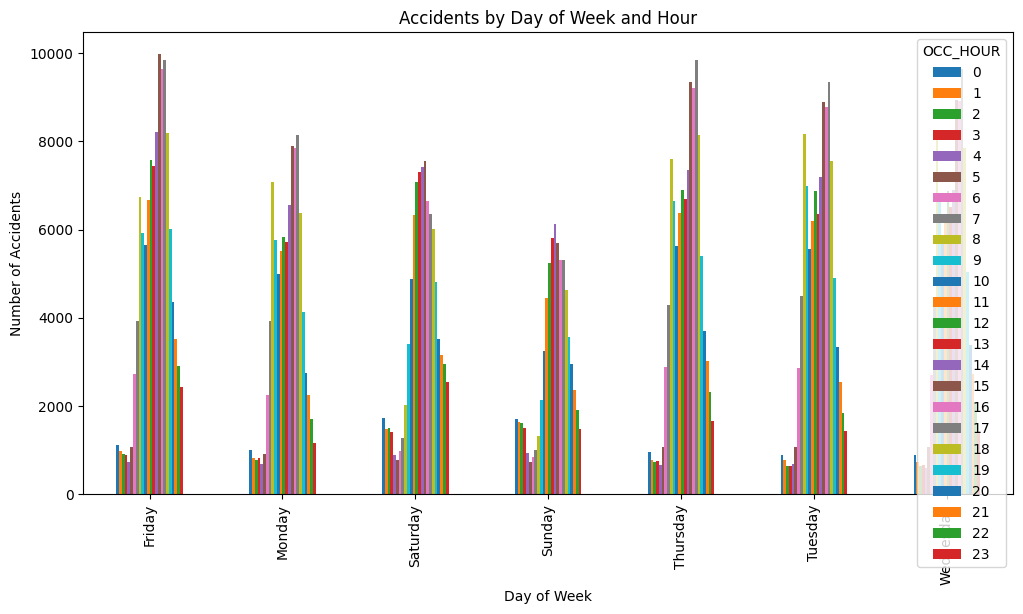

In [54]:
### Data Visualization
### Purpose: Analyze relationships between time, location, and participants
# Graph 1: Accident Time Bar Chart
import matplotlib.pyplot as plt
accident_time = collision_data.groupby(['OCC_DOW', 'OCC_HOUR']).size().unstack()
accident_time.plot(kind='bar', figsize=(12, 6))
plt.title("Accidents by Day of Week and Hour")
plt.ylabel("Number of Accidents")
plt.xlabel("Day of Week")
plt.show()

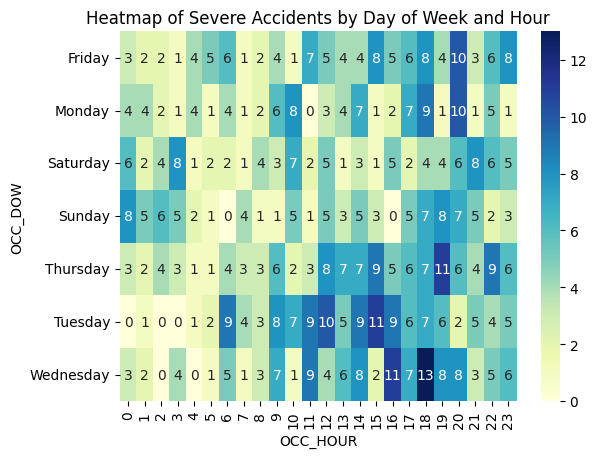

In [61]:
### Heatmap for relationship between the time that the accident happed and severity
import seaborn as sns
severe_time = collision_data[collision_data['SEVERE_ACCIDENTS'] == 1].groupby(['OCC_DOW', 'OCC_HOUR']).size().unstack()

#print(severe_time.isna().sum())
## By running the above code line, there is NaN in 'severe_time', which means there is no severe accidents during specific time slots
## Thus, we need to fill these NaN with 0
severe_time = severe_time.fillna(0)
sns.heatmap(severe_time, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Heatmap of Severe Accidents by Day of Week and Hour")
plt.show()


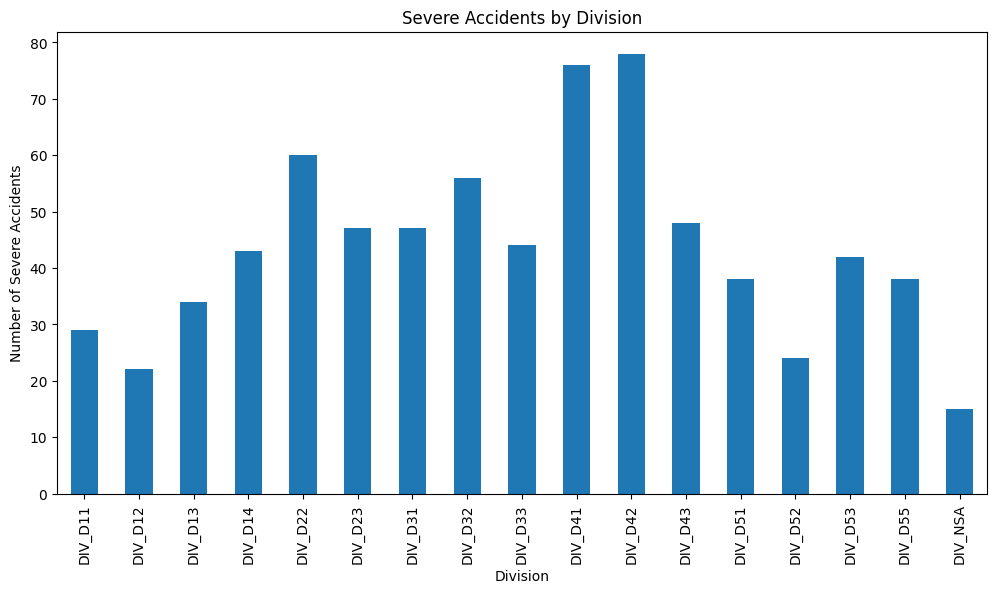

In [63]:
### Analysis by Location ---> 'DIVISION' and 'NEIGHBOURHOOD_158'
division_columns = [col for col in collision_data.columns if col.startswith('DIV_')]
division_accidents = collision_data[division_columns].mul(collision_data['SEVERE_ACCIDENTS'], axis=0).sum()
division_accidents.plot(kind='bar', figsize=(12, 6))
plt.title("Severe Accidents by Division")
plt.xlabel('Division')
plt.ylabel('Number of Severe Accidents')

plt.show()

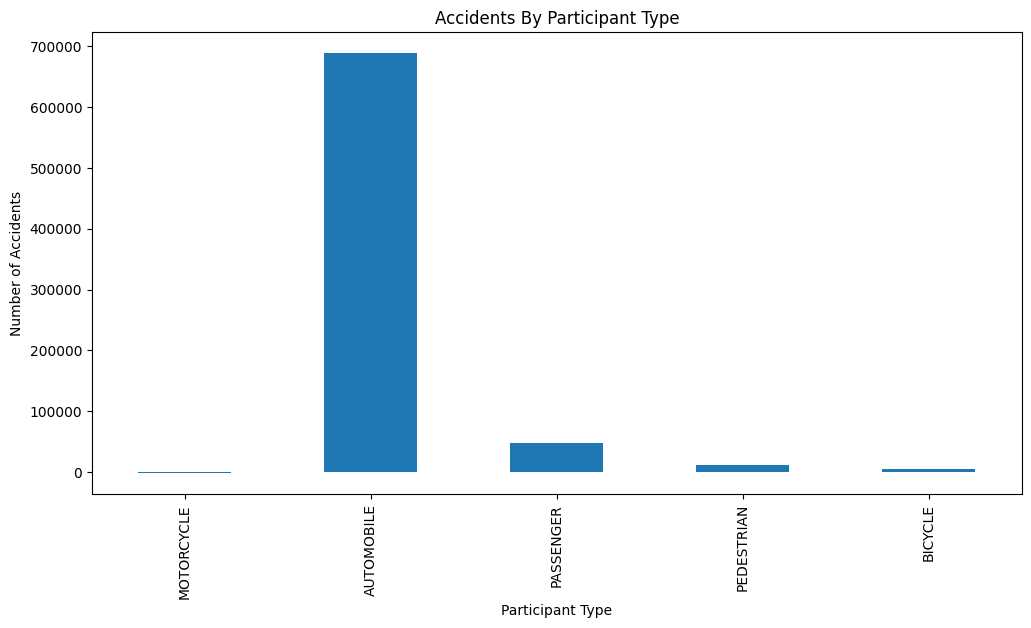

In [64]:
### Accidents Distribution among different participants (AUTOMOBILE, BICYCLE and etc..)
participants = ['MOTORCYCLE', 'AUTOMOBILE', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE']
participants_accidents = collision_data[participants].sum()
participants_accidents.plot(kind='bar', figsize=(12, 6))
plt.title('Accidents By Participant Type')
plt.xlabel('Participant Type')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
### Split the dataset
### Identify the features of the model
features = [
    'ACC_DOW', 'ACC_HOUR', 'MOTORCYCLE', 'AUTOMOBILE', 'PASSENGER',
    'PEDESTRIAN', 'BICYCLE'
]

features += [col for col in collision_data.columns if col.startswith('DIV_') or col.startswith('NBH_')]
X = collision_data[features]
y = collision_data['SEVERE_ACCIDENTS']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
### Split the dat
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
### Logical Regression Model Creation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


In [ ]:
### Decision Tree Model Creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
